# Assignment 2

Nama : Reynaldi Ananda Putra  
Kelompok : PYTN - KS09

Hacktiv8 Indonesia

# Soal Project Rubrik

## Pre-processing

Pada tahap pre-processing, ada beberapa langkah yang dilakukan seperti membersihkan data yang hilang atau tidak valid, mengonversi tipe data yang sesuai, dan mengeksplorasi statistik dasar

#### Melakukan Impor Liblary

liblary yang digunakan adalah sebagai berikut :
- Pandas 
Penggunaan: Memuat dataset, membersihkan data, menghitung statistik data.

- Numpy
Penggunaan: Penggunaan: Menghitung statistik, operasi matematika.

- Scipy:
Penggunaan: Uji statistik, perhitungan ilmiah.

- Matplotlib dan Seaborn:
Contoh Penggunaan: Membuat histogram, plot distribusi, dan visualisasi data.

- Scipy.stats:
Contoh Penggunaan: digunakan untuk melakukan berbagai uji statistik, seperti uji t (t-test) yang digunakan dalam pengujian hipotesis.

#### Melakukan Import Liblary

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns
import scipy.stats as stats

#### Melakukan Import Dataset

In [5]:
df = pd.read_csv("lnyc_rolling_sales.csv")

#### Pemeriksaan Data Awal:
Lihat data awalnya untuk memahami struktur dan isinya.

In [6]:
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


#### Cek untuk melihat nama-nama kolomnya

In [7]:
print(df.columns)

Index(['Unnamed: 0', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object')


#### Penghapusan Kolom yang Tidak Diperlukan:
Hapus kolom yang tidak diperlukan untuk analisis ini menggunakan metode .drop().

In [8]:
columns_to_drop = ['EASE-MENT', 'APARTMENT NUMBER', 'ADDRESS']
df.drop(columns=columns_to_drop, inplace=True)

#### Periksa apakah ada data yang hilang, menggunakan .isna()

In [9]:
# Menampilkan jumlah data yang hilang per kolom
missing_data = df.isna().sum()
print(missing_data)

Unnamed: 0                        0
BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
BUILDING CLASS AT PRESENT         0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64


#### Pengubahan Tipe Data:
Ubah tipe data kolom yang sesuai. Misalnya, kolom SALE DATE menjadi datetime.

In [10]:
df['SALE DATE'] = pd.to_datetime(df['SALE DATE'])

#### Menghapus Baris dengan Data Tidak Valid
menggunakan metode pd.to_numeric untuk mengidentifikasi baris dengan nilai yang tidak valid dan kemudian menghapusnya.

In [11]:
df['SALE PRICE'] = pd.to_numeric(df['SALE PRICE'], errors='coerce')
df = df.dropna(subset=['SALE PRICE'])

In [12]:
# Pastikan kolom 'SALE PRICE' adalah string (str) sebelum membaginya
df['SALE PRICE'] = df['SALE PRICE'].astype(str)

# Bagi nilai-nilai dalam kolom 'SALE PRICE'
df['SALE PRICE'] = df['SALE PRICE'].str.split('-').str[0]

# Konversi ke tipe data numerik
df['SALE PRICE'] = pd.to_numeric(df['SALE PRICE'], errors='coerce')

# Hapus baris dengan nilai NaN
df = df.dropna(subset=['SALE PRICE'])

#### Menghitung mean, median, modus, dan range

Pada perhitungan ini, memakai kolom SALE PRICE untuk mencari nilai mean, median, modus, dan range
- Mean SALE PRICE: 1276456.4977638705
- Median SALE PRICE: 530000.0
- Modus SALE PRICE: 0.0
- Range SALE PRICE: 2210000000.0



In [13]:
# Menghitung mean, median, dan modus dari SALE PRICE
mean_sale_price = df['SALE PRICE'].mean()
median_sale_price = df['SALE PRICE'].median()
mode_sale_price = df['SALE PRICE'].mode()[0]

# Menghitung range dari SALE PRICE
min_sale_price = df['SALE PRICE'].min()
max_sale_price = df['SALE PRICE'].max()
range_sale_price = max_sale_price - min_sale_price

print("Mean SALE PRICE:", mean_sale_price)
print("Median SALE PRICE:", median_sale_price)
print("Modus SALE PRICE:", mode_sale_price)
print("Range SALE PRICE:", range_sale_price)

Mean SALE PRICE: 1276456.4977638705
Median SALE PRICE: 530000.0
Modus SALE PRICE: 0.0
Range SALE PRICE: 2210000000.0


#### Variance, Standard Deviation, Probability Distribution

- Variance mengukur sebaran data dari rata-rata. menghitungnya dengan menggunakan metode .var() pada kolom "SALE PRICE".
- Standard deviation adalah akar kuadrat dari variance dan mengukur sebaran data dalam satuan yang sama dengan data asli. menghitungnya dengan menggunakan metode .std() pada kolom "SALE PRICE".
- Probability Distribution 

Variance pada kolom SALE PRICE menghasilkan 130079849507172.7

Standard Deviation pada kolom SALE PRICE menghasilkan 11405255.345987337


In [14]:
variance_sale_price = df['SALE PRICE'].var()
std_deviation_sale_price = df['SALE PRICE'].std()
print("Variance SALE PRICE:", variance_sale_price)
print("Standard Deviation SALE PRICE:", std_deviation_sale_price)

Variance SALE PRICE: 130079849507172.7
Standard Deviation SALE PRICE: 11405255.345987337


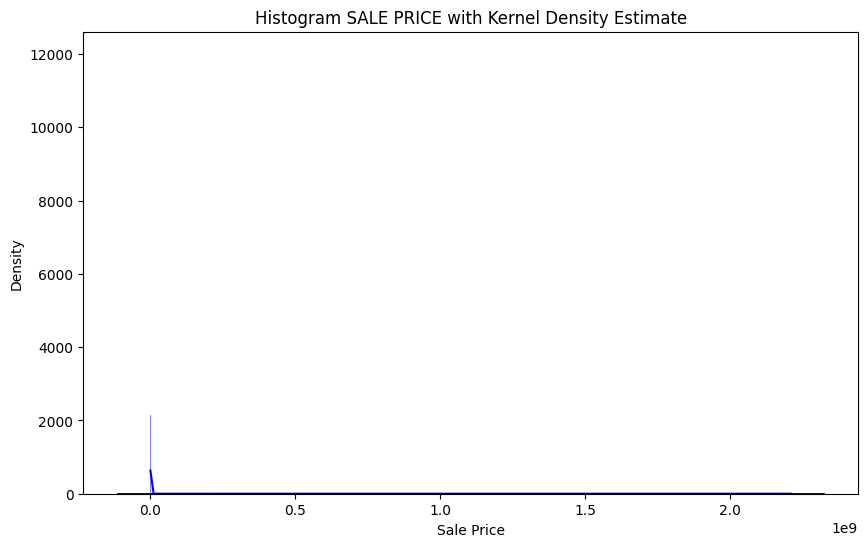

In [15]:
# Data SALE PRICE
sale_price_data = df['SALE PRICE'].dropna()

# Membuat histogram untuk melihat distribusi data SALE PRICE
plt.figure(figsize=(10, 6))
sns.histplot(sale_price_data, kde=True, color='blue')
plt.title("Histogram SALE PRICE with Kernel Density Estimate")
plt.xlabel("Sale Price")
plt.ylabel("Density")

# Memodelkan distribusi normal
mu, std = norm.fit(sale_price_data)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

plt.show()

#### Menghitung confidence interval dari data "SALE PRICE"

Menghitung confidence interval dari data "SALE PRICE" menggunakan pendekatan statistik, menghitung confidence interval untuk mean "SALE PRICE" dengan tingkat kepercayaan 95%, maka hasilnya adalah :

Confidence Interval (95%): (1191958.8897437286, 1360954.1057840125)

In [16]:
# Data SALE PRICE
sale_price_data = df['SALE PRICE'].dropna()

# Menghitung mean dan standard deviation
mean_sale_price = sale_price_data.mean()
std_deviation_sale_price = sale_price_data.std()

# Jumlah data
n = len(sale_price_data)

# Tingkat kepercayaan (misalnya, 95%)
confidence_level = 0.95

# Menghitung standard error
standard_error = std_deviation_sale_price / (n**0.5)

# Menghitung margin of error
z_score = stats.norm.ppf(1 - (1 - confidence_level) / 2)  # Z-score untuk tingkat kepercayaan
margin_of_error = z_score * standard_error

# Menghitung confidence interval
lower_limit = mean_sale_price - margin_of_error
upper_limit = mean_sale_price + margin_of_error

print("Mean SALE PRICE:", mean_sale_price)
print(f"Confidence Interval ({int(confidence_level*100)}%): ({lower_limit}, {upper_limit})")

Mean SALE PRICE: 1276456.4977638705
Confidence Interval (95%): (1191958.8897437286, 1360954.1057840125)


**Hypothesis testing**

Hypothesis testing adalah proses untuk menguji hipotesis statistik yang diajukan tentang sebuah populasi atau data. Untuk melakukan hypothesis testing, pertama-tama Anda perlu merumuskan hipotesis nol (null hypothesis) dan hipotesis alternatif (alternative hypothesis). Hipotesis nol adalah pernyataan bahwa tidak ada efek atau perbedaan yang signifikan, sementara hipotesis alternatif adalah pernyataan bahwa ada efek atau perbedaan yang signifikan.

Misalnya, kita ingin menguji apakah rata-rata SALE PRICE (harga jual) properti di dataset ini lebih dari $1,000,000. Berikut adalah langkah-langkahnya:

Hipotesis Nol (H0): Rata-rata SALE PRICE properti sama dengan atau kurang dari $1,000,000.

Hipotesis Alternatif (H1): Rata-rata SALE PRICE properti lebih dari $1,000,000.



**Results**

Perhitungan Hypothesis menghasilkan :

**- Hipotesis nol dapat ditolak.** Ini berarti bahwa dapat menolak hipotesis nol dalam uji statistik yang dilakukan. Dalam konteks ini, biasanya hipotesis nol adalah pernyataan bahwa tidak ada perbedaan atau efek yang signifikan.
**- Rata-rata SALE PRICE lebih dari $1000000.** hipotesis alternatif, yang menyatakan bahwa percaya rata-rata harga penjualan (SALE PRICE) lebih dari $1,000,000. Hasil ini menunjukkan bahwa berdasarkan data yang diuji, sehingga menjadikan bukti yang cukup kuat untuk mendukung hipotesis alternatif ini.
**- Nilai t-statistic: 6.412545770290963** Nilai ini adalah statistik t, Nilai t-statistic yang tinggi menunjukkan bahwa perbedaan antara rata-rata sampel dan hipotesis nol adalah signifikan.
**- Nilai p-value: 1.440179837641156e-10** P-value yang sangat kecil (dalam notasi ilmiah, e-10 berarti "10 pangkat -10") menunjukkan bahwa Anda memiliki bukti yang sangat kuat untuk menolak hipotesis nol.

Pada hypotesisi testing menunjukkan bahwa berdasarkan data Anda, rata-rata harga penjualan lebih dari $1,000,000, dan perbedaannya signifikan secara statistik. Anda dapat menolak hipotesis nol yang menyatakan bahwa rata-rata harga penjualan kurang dari atau sama dengan $1,000,000.

In [17]:
# Data SALE PRICE
sale_price_data = df['SALE PRICE'].dropna()

# Nilai yang diuji (dalam hal ini, $1,000,000)
mu = 1000000

# Melakukan t-test satu arah (one-tailed t-test)
t_statistic, p_value = stats.ttest_1samp(sale_price_data, mu)

# Tingkat signifikansi (alpha)
alpha = 0.05

# Menentukan apakah hipotesis nol dapat ditolak
if p_value < alpha:
    print("Hipotesis nol dapat ditolak.")
    print(f"Rata-rata SALE PRICE lebih dari ${mu}.")
else:
    print("Tidak cukup bukti untuk menolak hipotesis nol.")
    print(f"Rata-rata SALE PRICE sama dengan atau kurang dari ${mu}.")

print("Nilai t-statistic:", t_statistic)
print("Nilai p-value:", p_value)


Hipotesis nol dapat ditolak.
Rata-rata SALE PRICE lebih dari $1000000.
Nilai t-statistic: 6.412545770290963
Nilai p-value: 1.440179837641156e-10


# Project Overview

Using what you've learned: download the NYC Property Sales Dataset from Kaggle. This dataset is a record of every building or building unit (apartment, etc.) sold in the New York City property market over a 12-month period.

This dataset contains the location, address, type, sale price, and sale date of building units sold. A reference on the trickier fields:
- BOROUGH: A digit code for the borough the property is located inj in order these are Manhattan (1), Bronx (2), Brooklyn (3), Oueens (4), and Staten Island (5).
- BLOCK: LOT: The combination of borough, block, and lot forms a unigue key for property in New York City. Commonly called a BBL.
- BUILDING CLASS AT PRESENT and BUILDING CLASS AT TIME OF SALE: The type of building at various points in time.

Note that because this is a financial transaction dataset, there are some points that need to be kept in mind:

Many sales occur with a nonsensically small dollar amount: $0 most commonly. These sales are actually transfers of deeds between parties: for example, parents transferring ownership to their home to a child after moving out for retirement.

This dataset uses the financial definition of a building/building unit, for tax purposes. In case a single entity owns the building in guestion, a sale covers the value of the entire building. In case a building is owned piecemeal by its residents (acondominium), a sale refers to a single apartment (or group of apartments) owned by some individual.

Formulate a question and derive a statistical hypothesis test to answer the question. You have to demonstrate that you're able to make decisions using data in a scientific manner. Examples of questions can be:
- Is there a difference in unit sold between property built in 1900-2000 and 2001 so on?
- Is there a difference in unit sold based on building category?
- What can you discover about New York City real estate by looking at a year's worth of raw transaction records? Can you spot trends in the market?


#### - Is there a difference in unit sold between property built in 1900-2000 and 2001 so on? (Apakah ada perbedaan unit terjual antara properti yang dibangun pada tahun 1900-2000 dengan tahun 2001 dan seterusnya?)

Jawab :

Ada perbedaan terhadap penjualan unit antara properti yang dibangun pada tahun 1900-2000 dengan tahun 2001, pada tahun 1900 - 2000 total unit yang terjual adalah 155.164 sementara tahun 2001-seterusnya unit yang terjual hanya 25.781. selisih dari tahun 1900 - 2000 dengan tahun 2001-seterusnya adalah 129.383.

"Dapat disimpulkan bahwa total unit yang terjual mengalami penurunan"

Total Unit Terjual (Tahun 1900-2000): 121073
Total Unit Terjual (Tahun 2001 dan Seterusnya): 17326


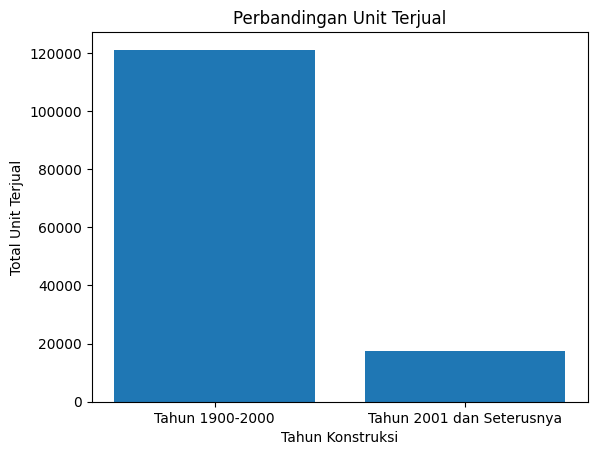

In [18]:
# Filter data untuk properti yang dibangun pada tahun 1900-2000
properties_1900_2000 = df[(df['YEAR BUILT'] >= 1900) & (df['YEAR BUILT'] <= 2000)]

# Filter data untuk properti yang dibangun pada tahun 2001 dan seterusnya
properties_2001_and_beyond = df[df['YEAR BUILT'] >= 2001]

# Hitung total unit terjual untuk masing-masing kelompok
total_units_1900_2000 = properties_1900_2000['TOTAL UNITS'].sum()
total_units_2001_and_beyond = properties_2001_and_beyond['TOTAL UNITS'].sum()

# Tampilkan hasil
print("Total Unit Terjual (Tahun 1900-2000):", total_units_1900_2000)
print("Total Unit Terjual (Tahun 2001 dan Seterusnya):", total_units_2001_and_beyond)

# Visualisasi perbandingan
labels = ['Tahun 1900-2000', 'Tahun 2001 dan Seterusnya']
units_sold = [total_units_1900_2000, total_units_2001_and_beyond]

plt.bar(labels, units_sold)
plt.title('Perbandingan Unit Terjual')
plt.xlabel('Tahun Konstruksi')
plt.ylabel('Total Unit Terjual')
plt.show()

##### - Is there a difference in unit sold based on building category? (Apakah ada perbedaan unit yang terjual berdasarkan kategori bangunan?)

Jawab :
- Terdapat variasi yang signifikan dalam jumlah unit yang terjual di antara berbagai kategori bangunan. Beberapa kategori bangunan mungkin memiliki jumlah unit terjual yang jauh lebih tinggi daripada yang lain.

- Kategori bangunan dengan total unit terjual tertinggi mungkin menjadi pilihan populer di pasar real estate. Ini dapat mengindikasikan preferensi atau permintaan yang kuat untuk jenis bangunan tertentu.

- Sebaliknya, kategori bangunan dengan total unit terjual yang rendah mungkin memiliki permintaan yang lebih rendah atau mungkin kurang diminati oleh pembeli.

- Informasi ini dapat berguna bagi pengembang properti, investor, atau profesional real estate untuk memahami tren pasar dan mengambil keputusan yang lebih baik terkait investasi, pengembangan, atau penjualan properti.

- RENTALS - WALKUP APARTMENTS merupakan kategori dengan total unit terjual tertinggi dengan total unit terjual yaitu 39.989

BUILDING CLASS CATEGORY
07 RENTALS - WALKUP APARTMENTS                  31075
02 TWO FAMILY DWELLINGS                         26863
08 RENTALS - ELEVATOR APARTMENTS                23361
01 ONE FAMILY DWELLINGS                         14801
03 THREE FAMILY DWELLINGS                       10980
13 CONDOS - ELEVATOR APARTMENTS                 10439
10 COOPS - ELEVATOR APARTMENTS                   7140
14 RENTALS - 4-10 UNIT                           2976
33 EDUCATIONAL FACILITIES                        2312
22 STORE BUILDINGS                               2266
26 OTHER HOTELS                                  2106
11A CONDO-RENTALS                                1678
21 OFFICE BUILDINGS                              1510
04 TAX CLASS 1 CONDOS                            1430
15 CONDOS - 2-10 UNIT RESIDENTIAL                1155
25 LUXURY HOTELS                                  862
44 CONDO PARKING                                  804
12 CONDOS - WALKUP APARTMENTS                     748
09 C

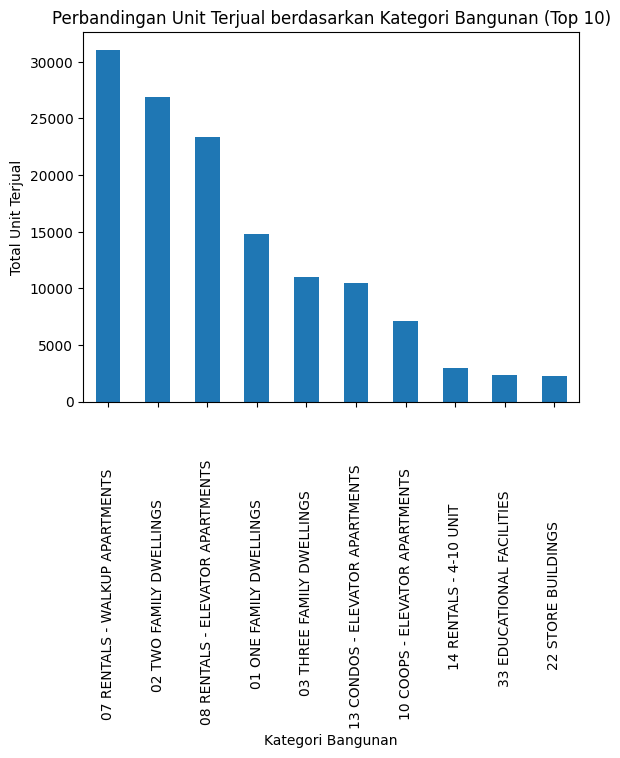

In [19]:
###Group data berdasarkan kategori bangunan dan hitung total unit terjual per kategori
building_category_units = df.groupby('BUILDING CLASS CATEGORY')['TOTAL UNITS'].sum()

# Sort data berdasarkan total unit terjual secara descending
building_category_units = building_category_units.sort_values(ascending=False)

# Tampilkan hasil
print(building_category_units)

# Visualisasi perbandingan (misalnya, 10 teratas)
building_category_units.head(10).plot(kind='bar')
plt.title('Perbandingan Unit Terjual berdasarkan Kategori Bangunan (Top 10)')
plt.xlabel('Kategori Bangunan')
plt.ylabel('Total Unit Terjual')
plt.xticks(rotation=90)
plt.show()

##### - What can you discover about New York City real estate by looking at a year's worth of raw transaction records? Can you spot trends in the market? (Apa yang dapat Anda temukan tentang real estate Kota New York dengan melihat catatan transaksi mentah selama satu tahun? Bisakah Anda melihat tren di pasar?)

1. Tren Pasar: Berdasarkan grafik tren pasar, tampak ada fluktuasi sepanjang tahun, dengan beberapa bulan mengalami peningkatan dan penurunan transaksi. Tren pasar cenderung dinamis, dan tidak ada tren yang sangat konsisten selama satu tahun.

2. Kenaikan Musiman: Terlihat adanya fluktuasi yang bersifat musiman dalam transaksi real estate. Beberapa bulan mungkin lebih aktif dalam hal transaksi daripada yang lain. Ini mungkin terkait dengan faktor-faktor seperti musim atau periode liburan.

3. Pemahaman Lokal: Tren pasar dapat sangat bervariasi berdasarkan lokasi, jadi penting untuk mempertimbangkan perbedaan antara berbagai wilayah di Kota New York.

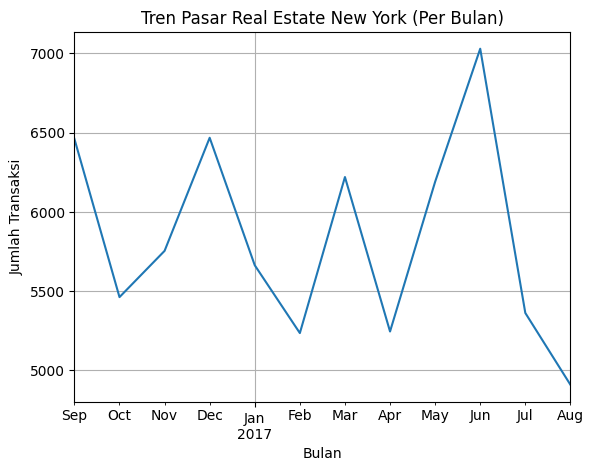

In [20]:
# Konversi kolom 'SALE DATE' menjadi tipe data datetime
df['SALE DATE'] = pd.to_datetime(df['SALE DATE'])

# Ekstrak bulan dari kolom 'SALE DATE' dan simpan dalam kolom baru 'SALE MONTH'
df['SALE MONTH'] = df['SALE DATE'].dt.to_period('M')

# Hitung total transaksi per bulan
transactions_per_month = df['SALE MONTH'].value_counts().sort_index()

import matplotlib.pyplot as plt

# Plot tren pasar
transactions_per_month.plot(kind='line')
plt.title('Tren Pasar Real Estate New York (Per Bulan)')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Transaksi')
plt.grid(True)
plt.show()